# Practicing EDA & ML models on Titanic dataset

In [1]:
# Importing essential libraries

import numpy as np
import pandas as pd
import warnings # for ignoring any warnings
warnings.filterwarnings('ignore') # to ignore warnings
import seaborn as sb
sb.set(style='white', color_codes=True) # some styling parameters
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Loading and reading data

titanic=pd.read_csv('titanic_train.csv')
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
# Sorting columns by their Datatype

titanic.columns.to_series().groupby(titanic.dtypes).groups

{int64: ['PassengerId', 'Survived', 'Pclass', 'SibSp', 'Parch'], float64: ['Age', 'Fare'], object: ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']}

#### Observation from above:

- The Titanic dataset contains 891 rows & 12 columns
- Our objective is to predict Survival using classification algorithim
- Our target variable is 'Survived'
- We have 5 features with object datatypes & rest with numerical features

### Data Quality checking for below:

- Dataset can contain duplicates entries, whitespaces or missing value, etc.

In [4]:
# Checking duplicate values

titanic.duplicated().sum()

0

In [5]:
# Checking null values

titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# Finding any null values

print(titanic.isna().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


<AxesSubplot:>

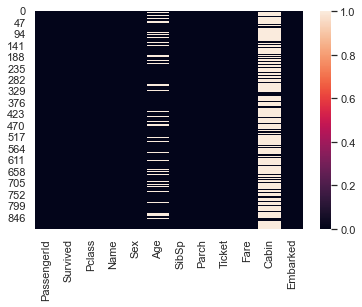

In [7]:
# Checking missing values

sb.heatmap(titanic.isnull())

In [8]:
# Converting missing values data into percentage

missing_values=titanic.isnull().sum().sort_values(ascending=False)
percentage_missing_values=(missing_values/len(titanic))*100
print(pd.concat([missing_values, percentage_missing_values], axis=1, keys=['Missing Values', '% Missing Data']))

             Missing Values  % Missing Data
Cabin                   687       77.104377
Age                     177       19.865320
Embarked                  2        0.224467
PassengerId               0        0.000000
Survived                  0        0.000000
Pclass                    0        0.000000
Name                      0        0.000000
Sex                       0        0.000000
SibSp                     0        0.000000
Parch                     0        0.000000
Ticket                    0        0.000000
Fare                      0        0.000000


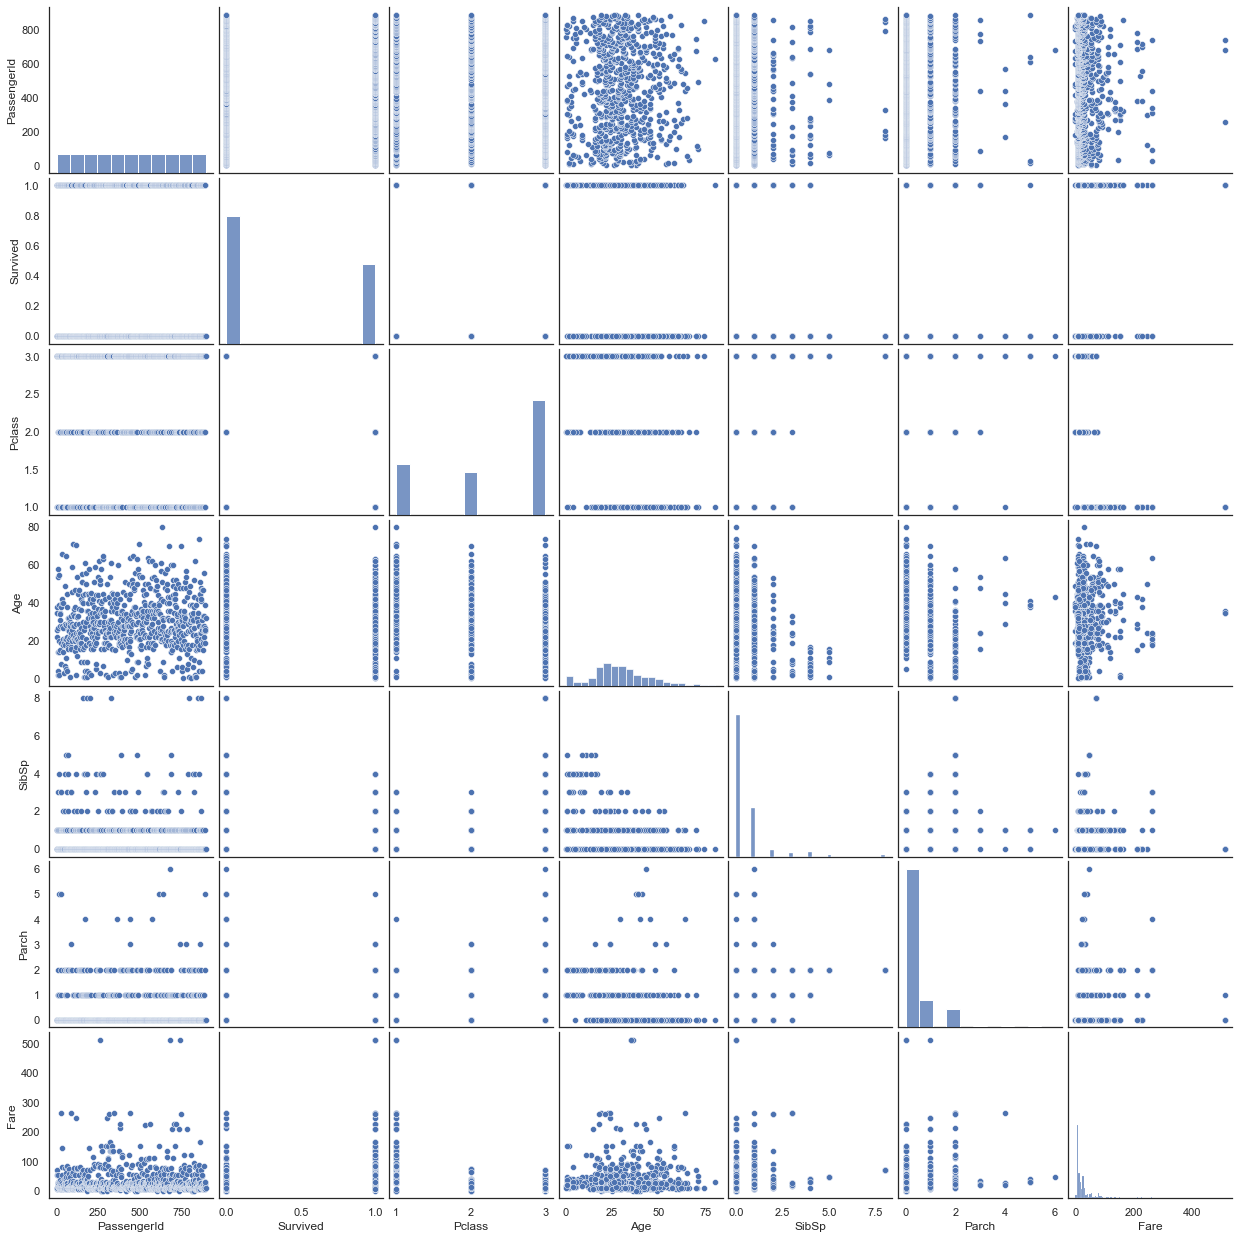

In [9]:
# Pairplot displaying all columns:

sb.pairplot(titanic) # displaying DataFrame

#### Observation from above:

- Dataset do not contain any duplicate values
- Feature -- 'Age', 'Embarked', and 'Cabin' have null values
- **_Age_** has **_19.86%_** data as null
- **_Embarked_** has **_0.22%_** data as null
- **_Cabin_** has **_77.10%_** data as null
- We can drop **_Cabin_** column as 77.10% of its values is missing and cannot contribute to building a good model for predicting the target variable values

In [10]:
titanic.describe() # Statistical summary

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
# Checking number of unique values for each column

titanic.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

#### Observation from above:

- PassengerId & Name has 891 discrete values
- Survived has 2 categories / classes
- Pclass has 3 categories / classes
- Sex has 2 categories / classes
- Age has 88 discrete values
- SibSp has 7 discrete values
- Parch has 7 discrete values
- Ticket has 681 discrete values
- Fare has 248 discrete values
- Cabin has 147 discrete values
- Embarked has 3 categories / classes


- We can drop **_Cabin_** column as 77.10% of its data is missing values

In [12]:
titanic.drop(columns=['Cabin'],inplace=True) # dropped Cabin column

In [13]:
# Checking value count for Survived

titanic['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

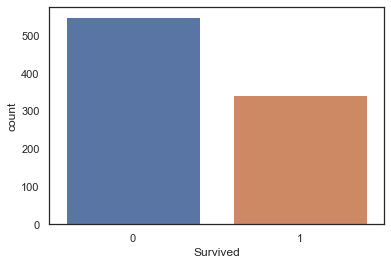

In [14]:
sb.countplot(x = 'Survived', data=titanic)

<AxesSubplot:xlabel='Survived', ylabel='count'>

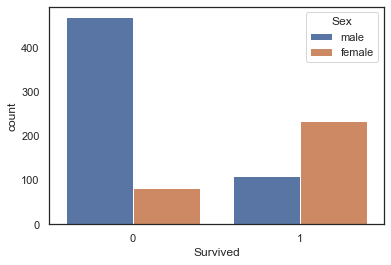

In [15]:
sb.countplot(x='Survived', hue='Sex', data=titanic)

<AxesSubplot:xlabel='Survived', ylabel='count'>

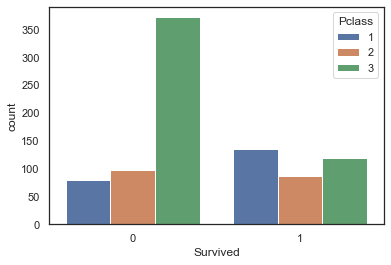

In [16]:
sb.countplot(x='Survived', hue='Pclass', data=titanic)

<AxesSubplot:xlabel='Age', ylabel='Density'>

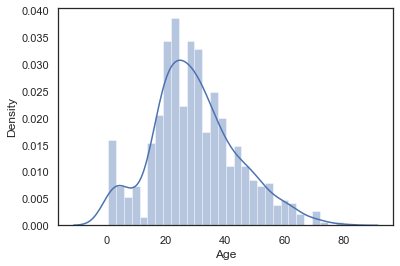

In [17]:
sb.distplot(titanic['Age'], bins=30)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

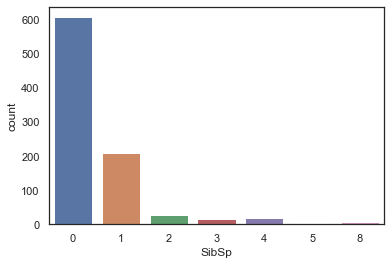

In [18]:
sb.countplot(x='SibSp', data=titanic)

<AxesSubplot:xlabel='Fare', ylabel='Density'>

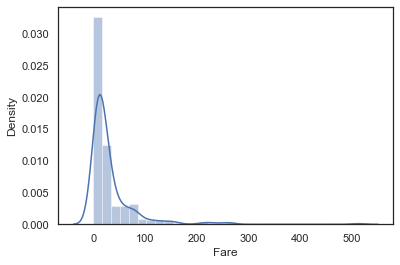

In [19]:
sb.distplot(titanic['Fare'], bins=30)

<AxesSubplot:>

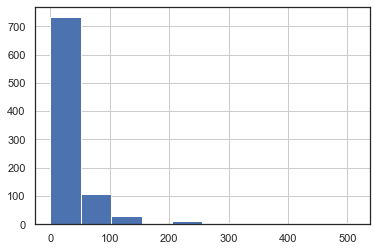

In [20]:
titanic['Fare'].hist()

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

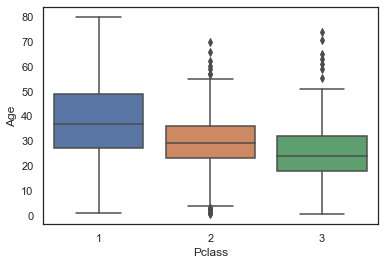

In [21]:
sb.boxplot(x='Pclass', y='Age', data=titanic)

In [22]:
# Replacing NaN values with the mean of Pclass in age using def function

def inpute_age(cols):
    Age=cols[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
        return Age

In [23]:
titanic['Age']=titanic[['Age', 'Pclass']].apply(inpute_age,axis=1)

<AxesSubplot:>

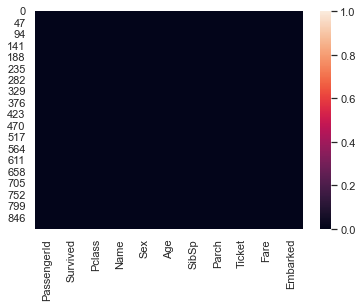

In [24]:
sb.heatmap(titanic.isnull())

In [25]:
# Checking null values

titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


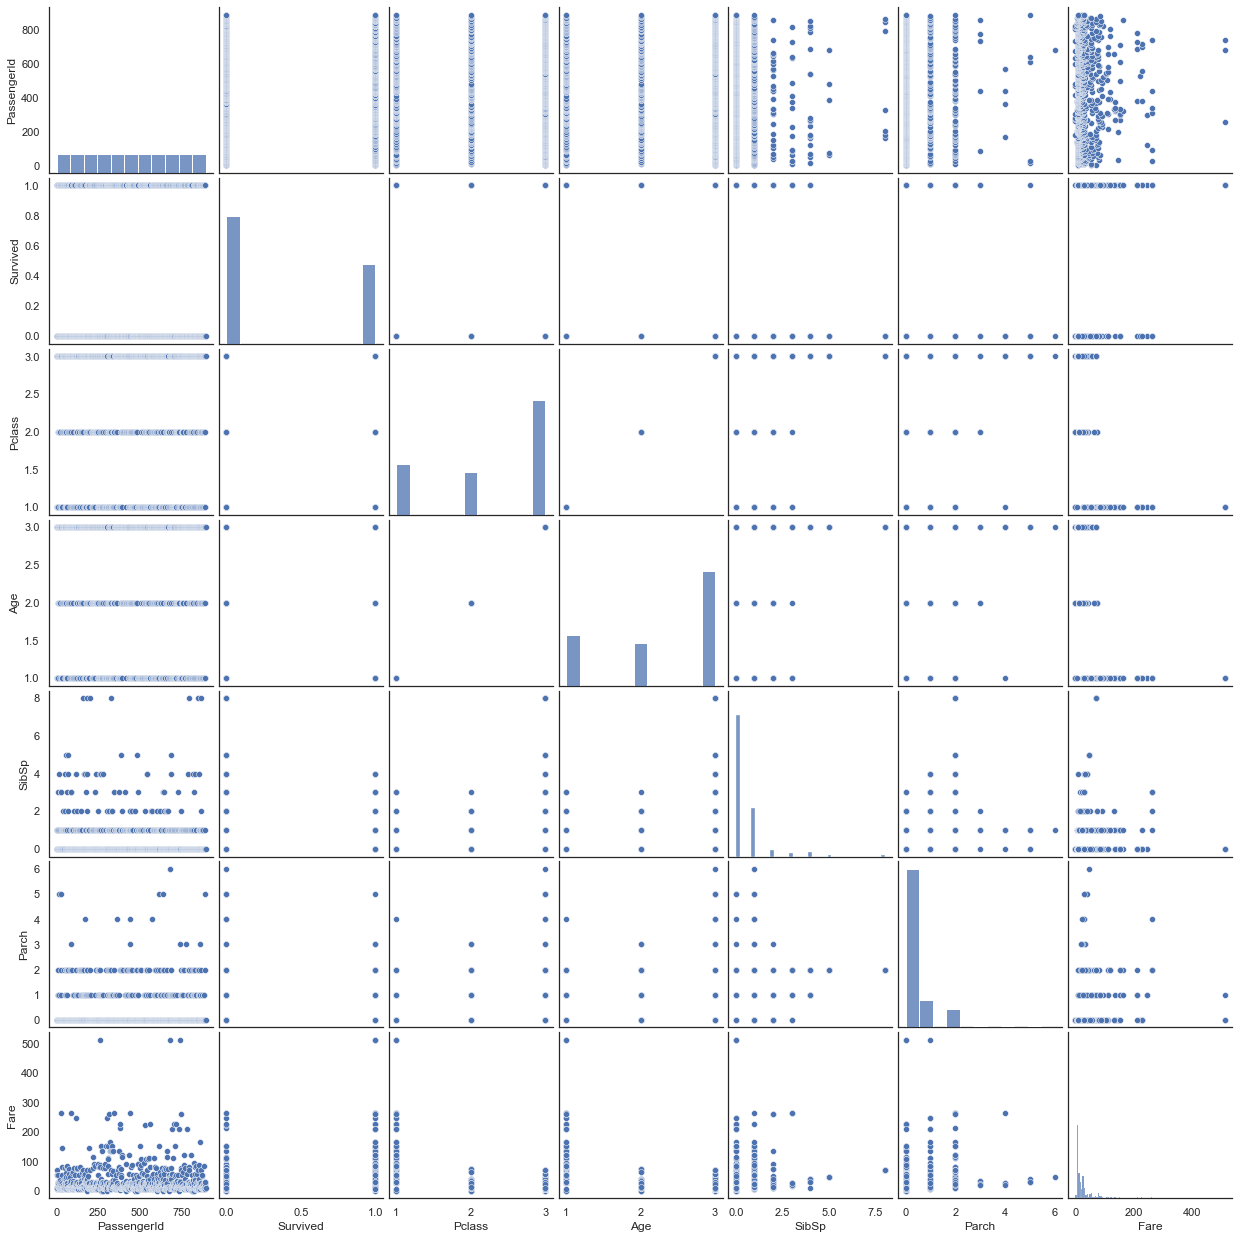

In [26]:
# Pairplot displaying all columns:

sb.pairplot(titanic) # displaying DataFrame

In [27]:
pd.get_dummies(titanic['Embarked'], drop_first=True).head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [28]:
sex=pd.get_dummies(titanic['Sex'], drop_first=True)
embark=pd.get_dummies(titanic['Embarked'], drop_first=True)

In [29]:
titanic.drop(['Sex', 'Embarked', 'Name', 'Ticket'], axis=1, inplace=True)

In [30]:
titanic

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,3.0,1,0,7.2500
1,2,1,1,1.0,1,0,71.2833
2,3,1,3,3.0,0,0,7.9250
3,4,1,1,1.0,1,0,53.1000
4,5,0,3,3.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,887,0,2,2.0,0,0,13.0000
887,888,1,1,1.0,0,0,30.0000
888,889,0,3,3.0,1,2,23.4500
889,890,1,1,1.0,0,0,30.0000


In [31]:
titanic=pd.concat([titanic, sex, embark], axis=1)

In [32]:
titanic

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,3.0,1,0,7.2500,1,0,1
1,2,1,1,1.0,1,0,71.2833,0,0,0
2,3,1,3,3.0,0,0,7.9250,0,0,1
3,4,1,1,1.0,1,0,53.1000,0,0,1
4,5,0,3,3.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,2.0,0,0,13.0000,1,0,1
887,888,1,1,1.0,0,0,30.0000,0,0,1
888,889,0,3,3.0,1,2,23.4500,0,0,1
889,890,1,1,1.0,0,0,30.0000,1,0,0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


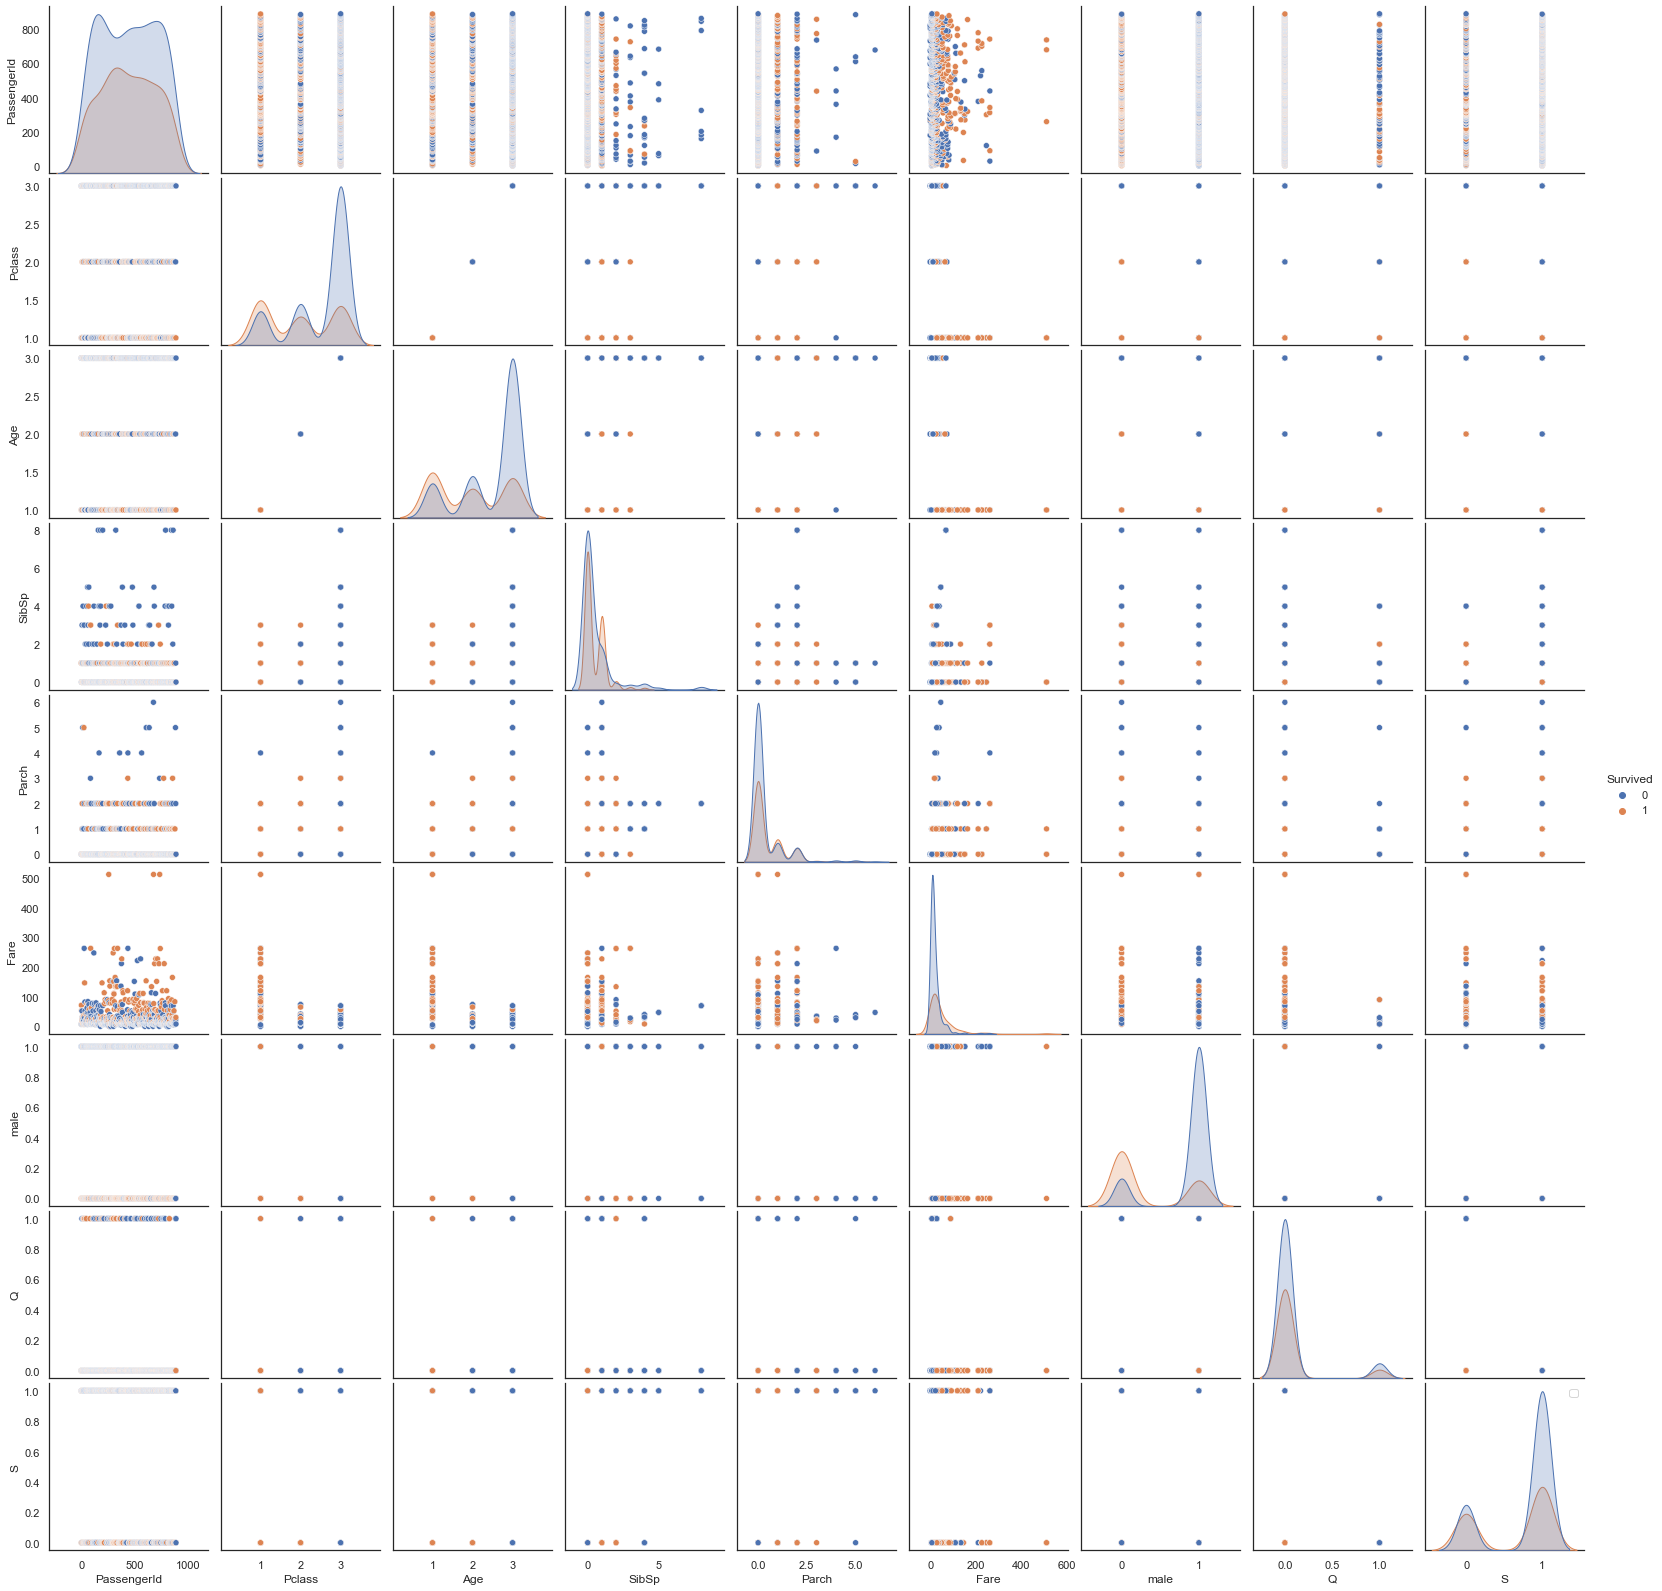

In [33]:
sb.pairplot(data=titanic, hue='Survived')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


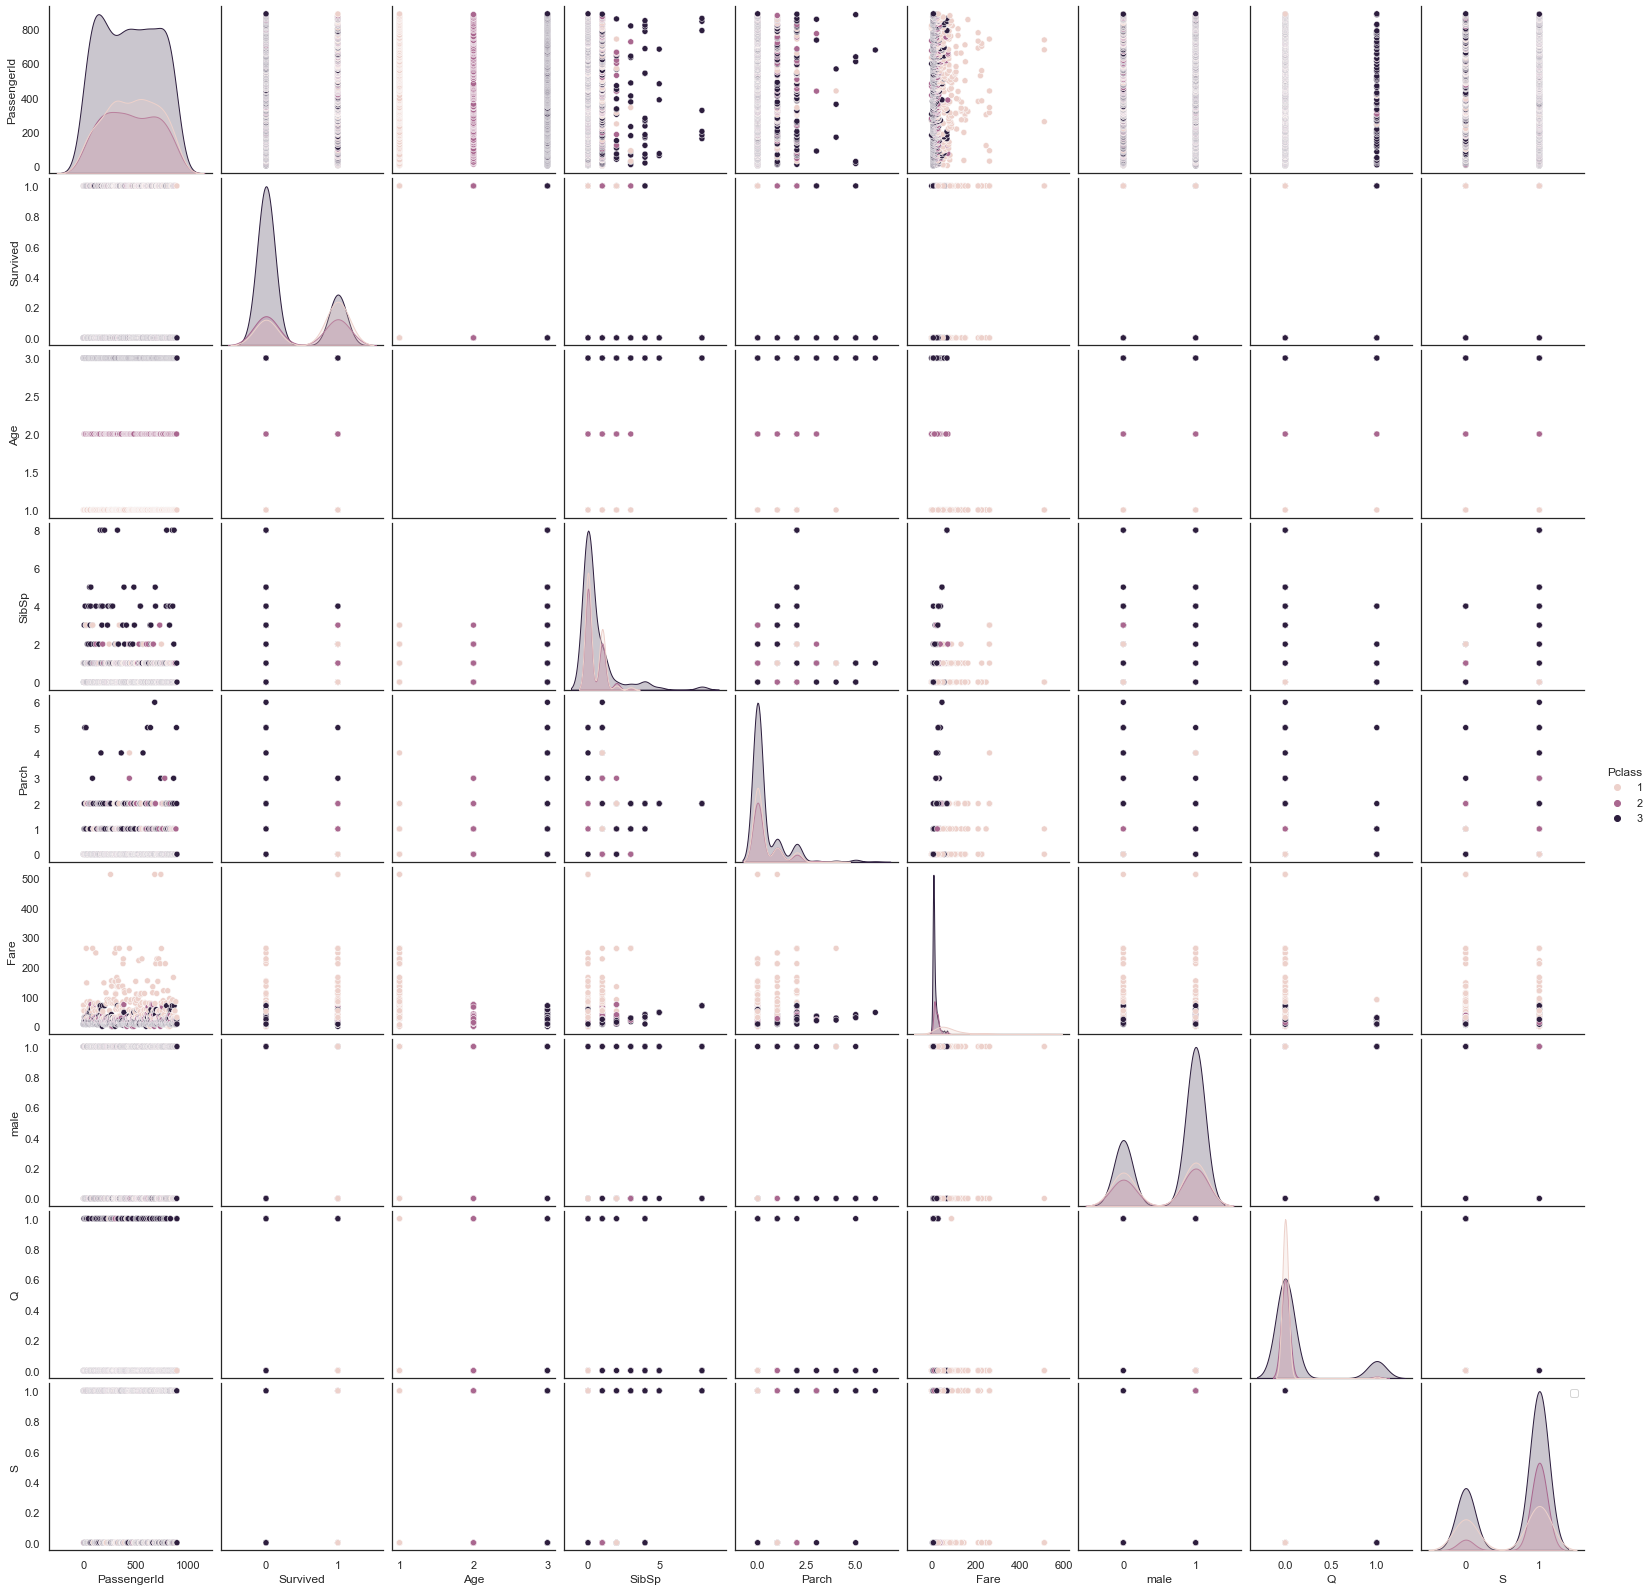

In [34]:
sb.pairplot(data=titanic, hue='Pclass')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


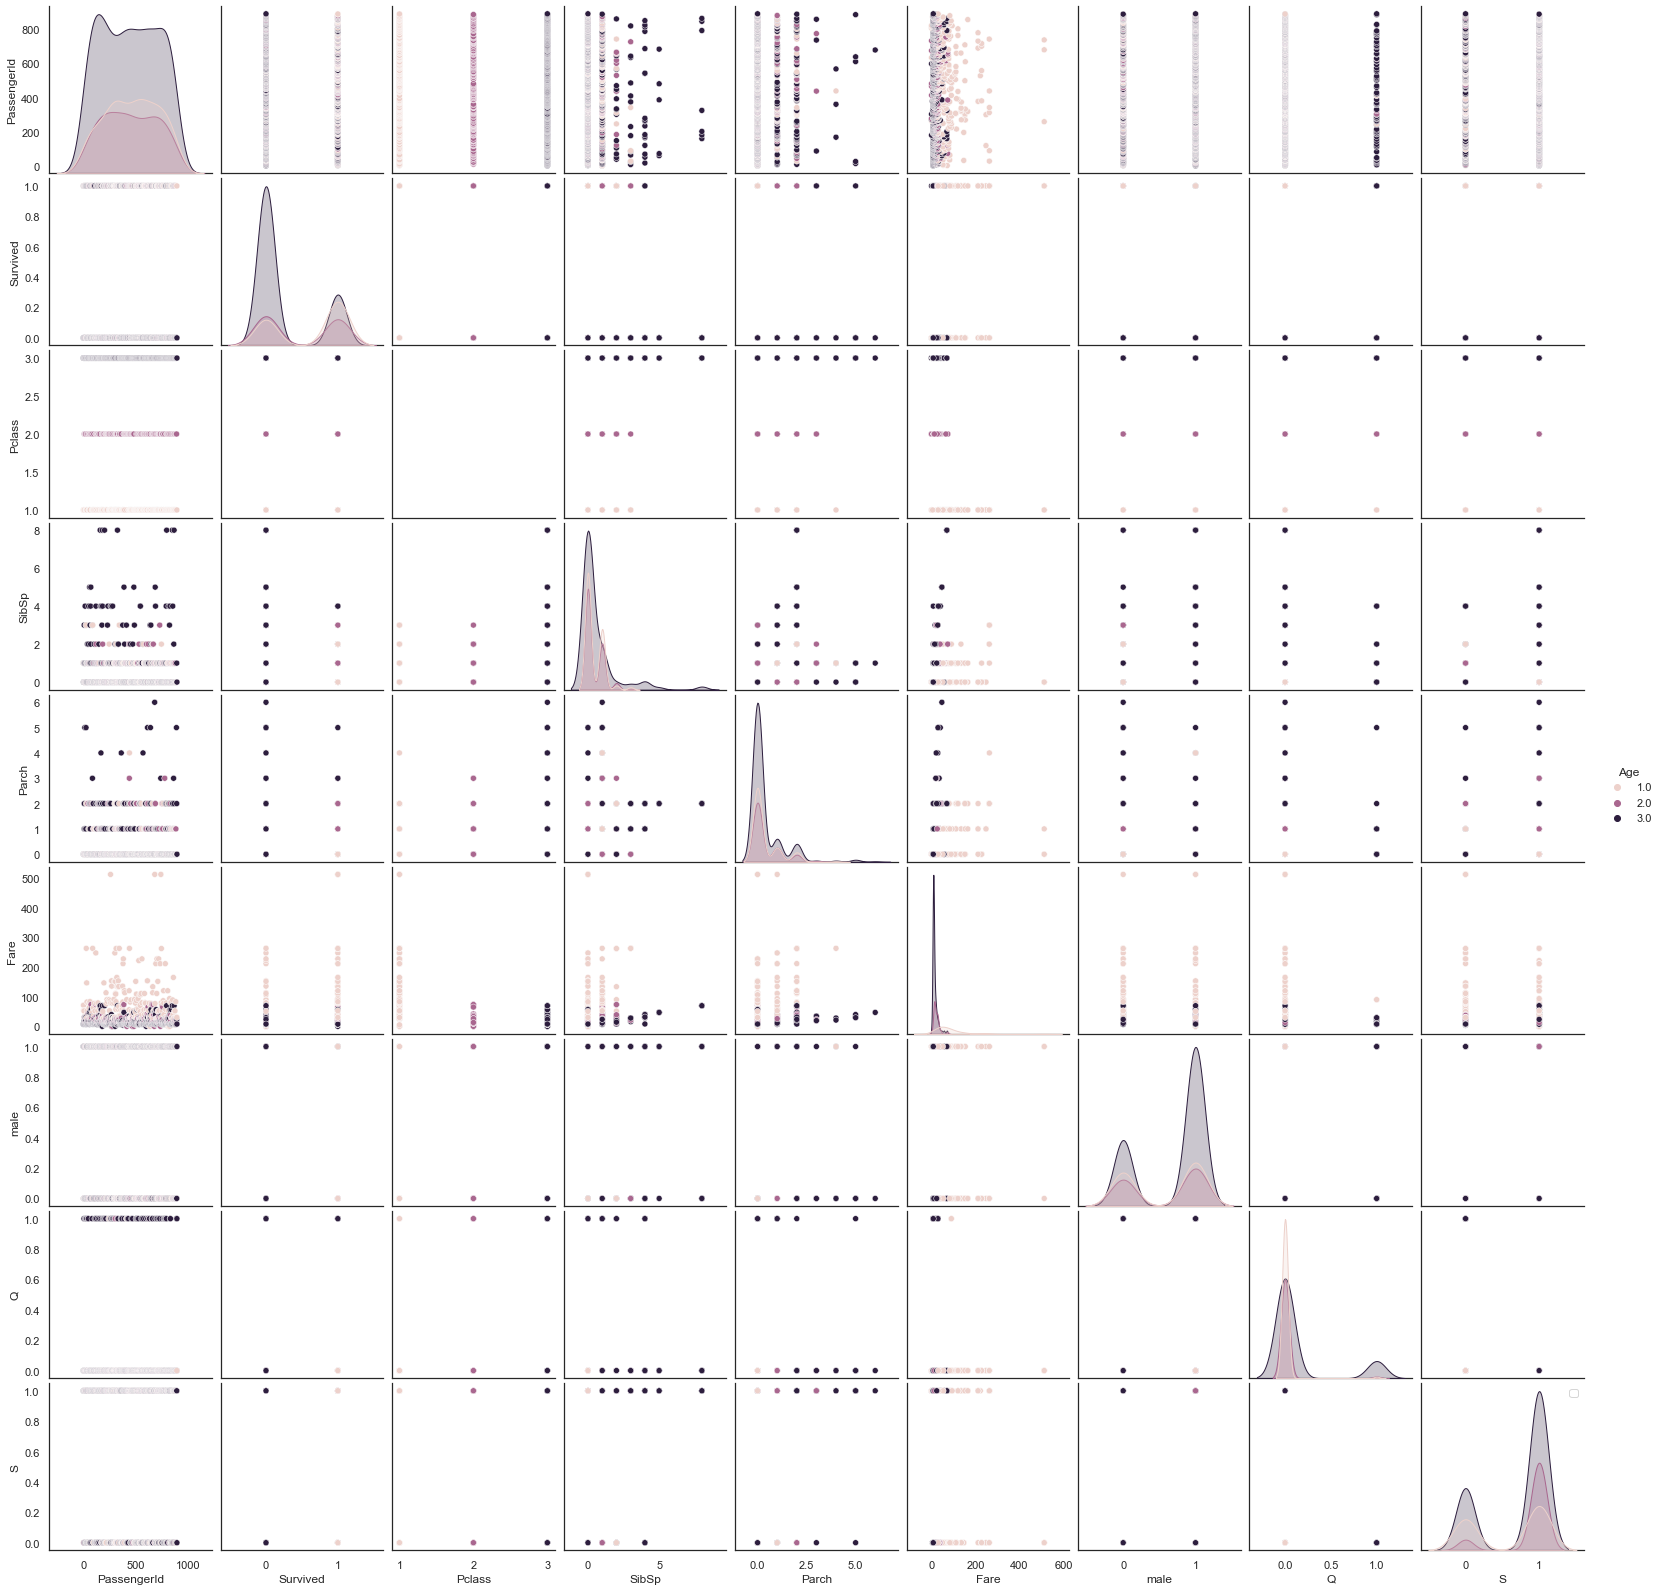

In [35]:
sb.pairplot(data=titanic, hue='Age')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


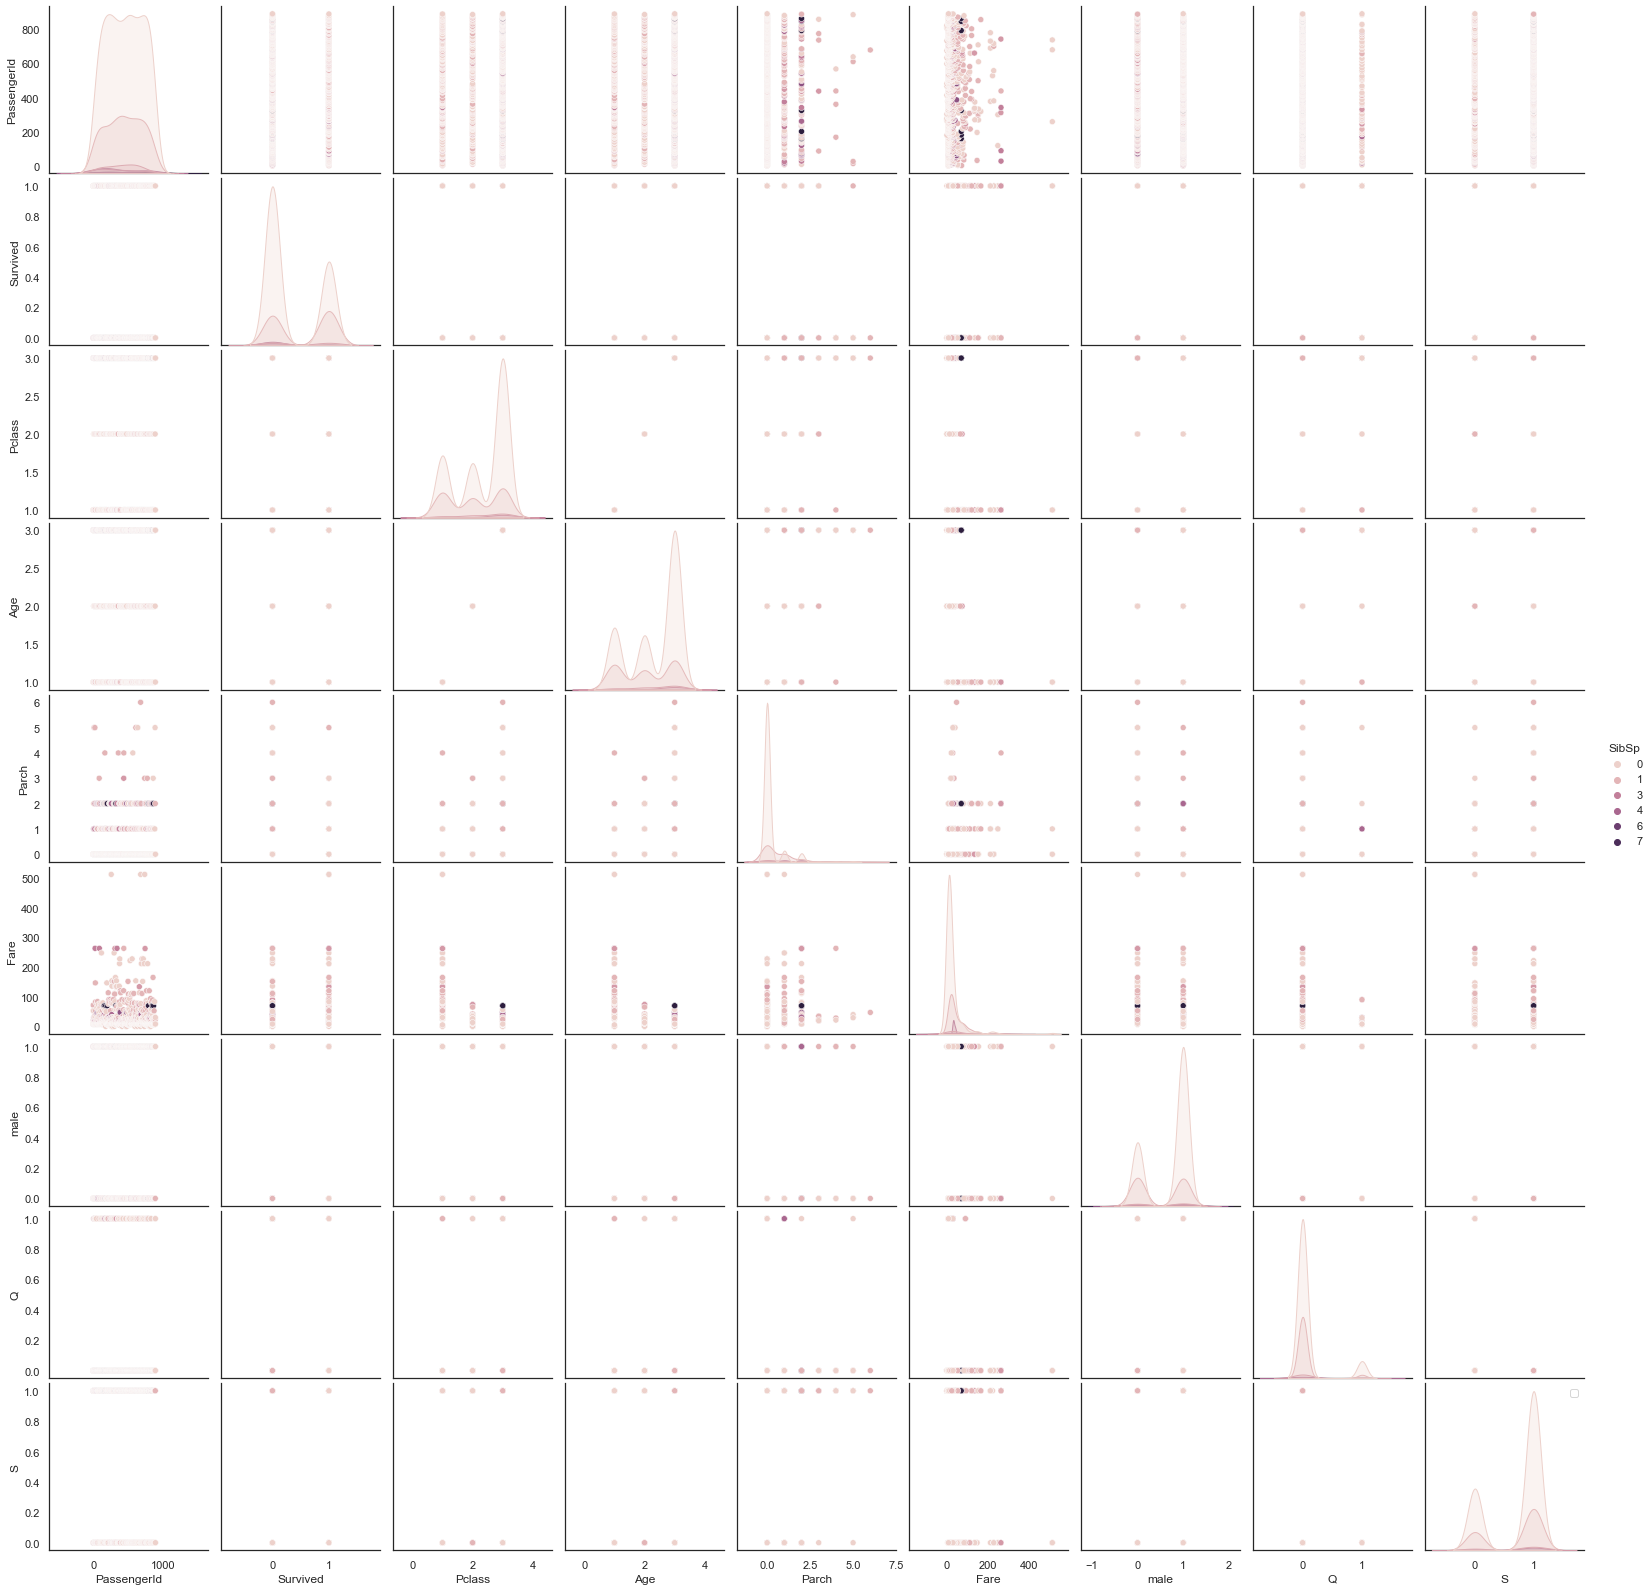

In [36]:
sb.pairplot(data=titanic, hue='SibSp')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


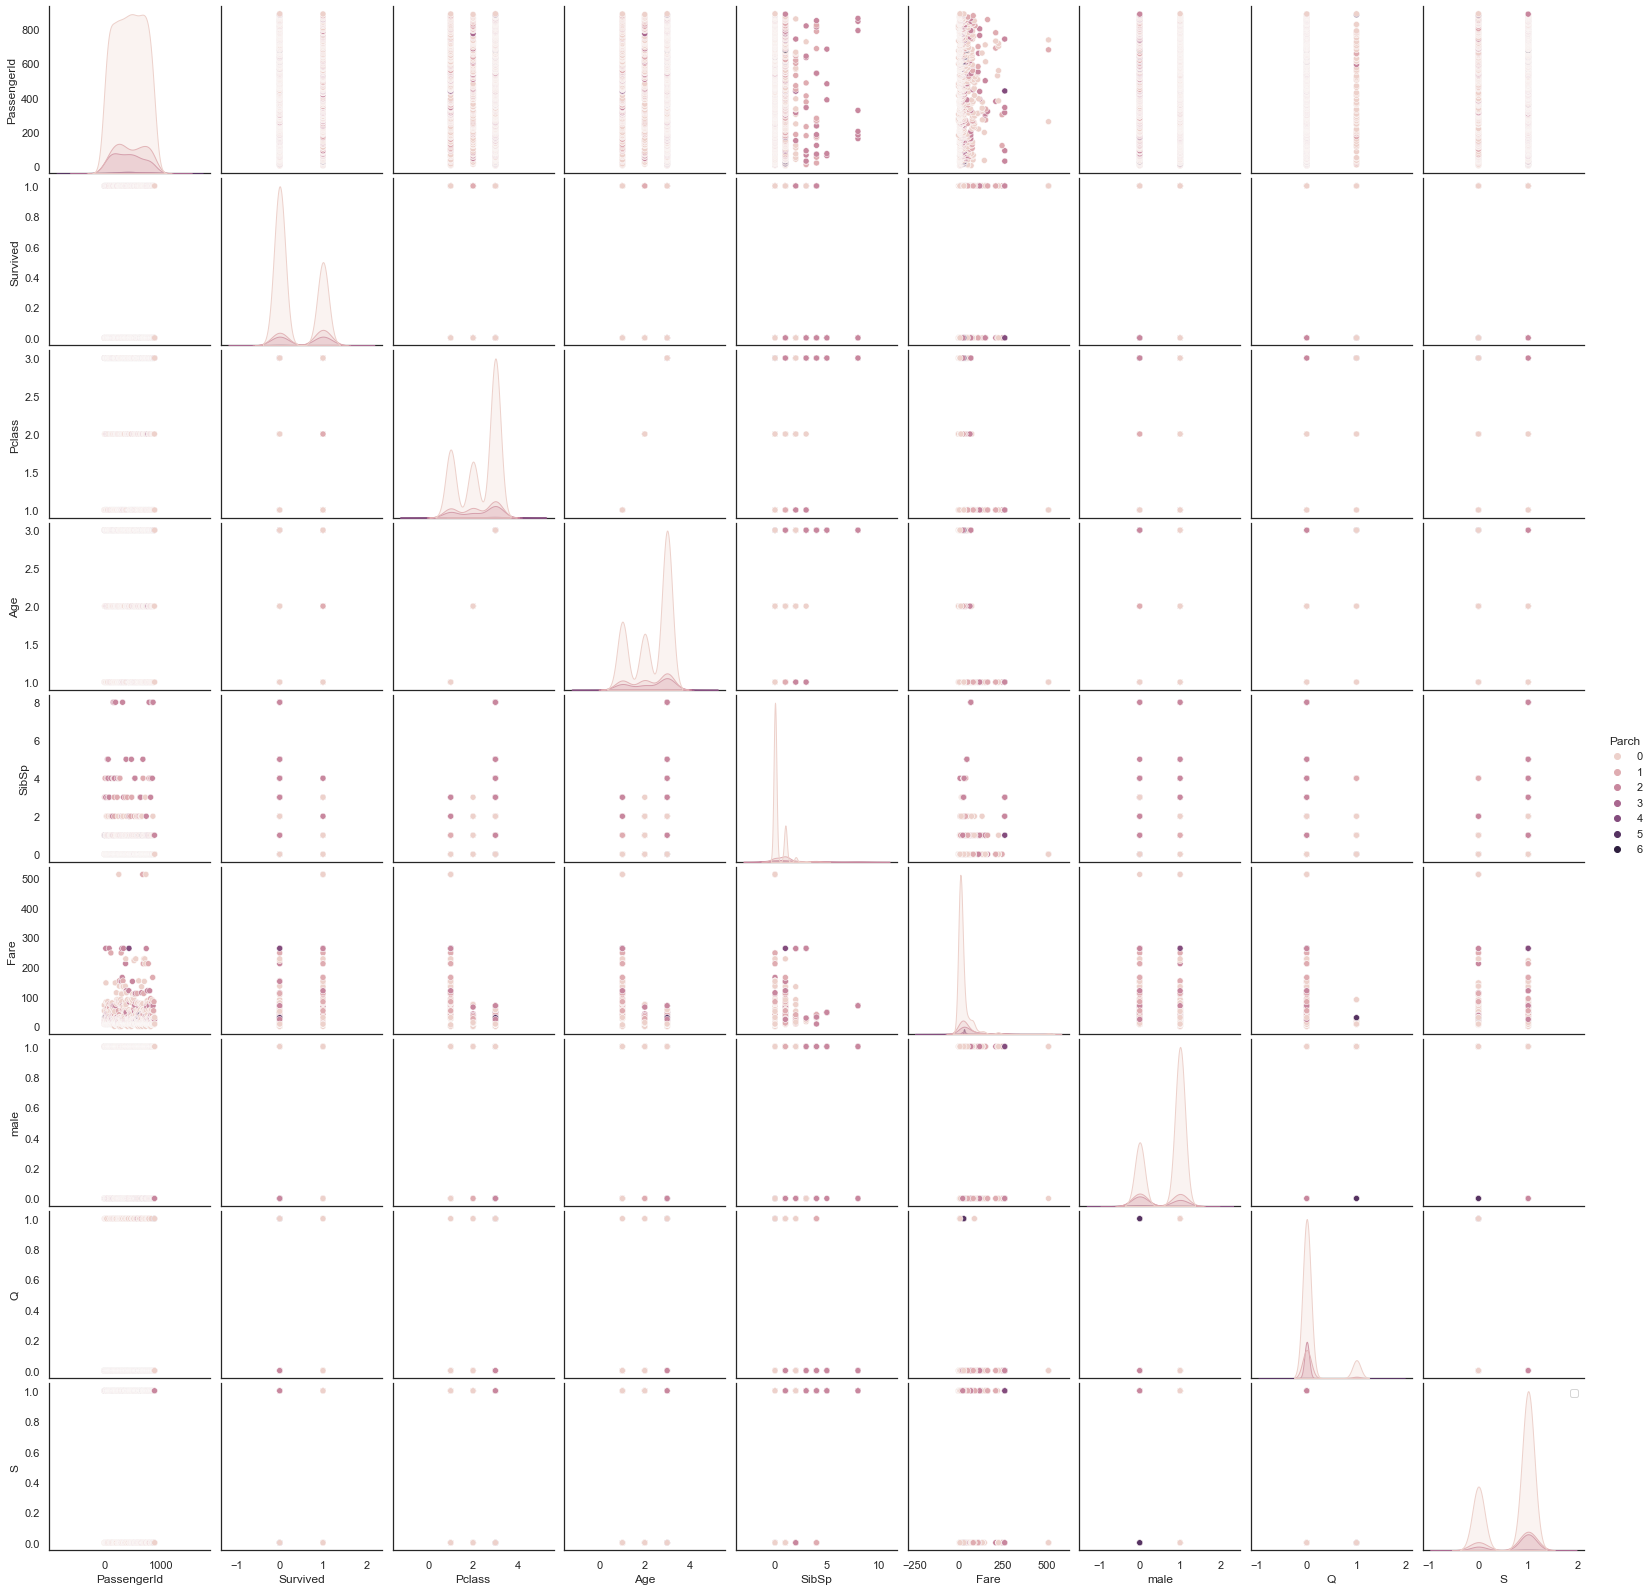

In [37]:
sb.pairplot(data=titanic, hue='Parch')
plt.legend()
plt.show()

In [38]:
# Checking Correlation using Heatmap for each column

titanic.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
PassengerId,1.000000,-0.005007,-0.035144,-0.035144,-0.057527,-0.001652,0.012658,0.042939,-0.033606,0.022148
Survived,-0.005007,1.000000,-0.338481,-0.338481,-0.035322,0.081629,0.257307,-0.543351,0.003650,-0.155660
Pclass,-0.035144,-0.338481,1.000000,1.000000,0.083081,0.018443,-0.549500,0.131900,0.221009,0.081720
Age,-0.035144,-0.338481,1.000000,1.000000,0.083081,0.018443,-0.549500,0.131900,0.221009,0.081720
SibSp,-0.057527,-0.035322,0.083081,0.083081,1.000000,0.414838,0.159651,-0.114631,-0.026354,0.070941
Parch,-0.001652,0.081629,0.018443,0.018443,0.414838,1.000000,0.216225,-0.245489,-0.081228,0.063036
Fare,0.012658,0.257307,-0.549500,-0.549500,0.159651,0.216225,1.000000,-0.182333,-0.117216,-0.166603
male,0.042939,-0.543351,0.131900,0.131900,-0.114631,-0.245489,-0.182333,1.000000,-0.074115,0.125722
Q,-0.033606,0.003650,0.221009,0.221009,-0.026354,-0.081228,-0.117216,-0.074115,1.000000,-0.496624
S,0.022148,-0.155660,0.081720,0.081720,0.070941,0.063036,-0.166603,0.125722,-0.496624,1.000000


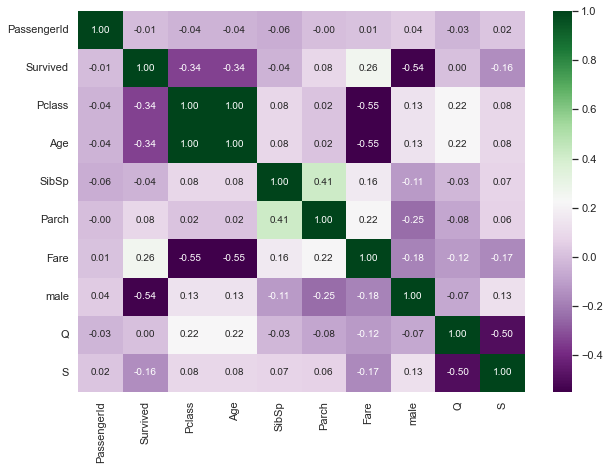

In [39]:
plt.figure(figsize=(10,7))
sb.heatmap(titanic.corr(),cmap='PRGn',fmt=".2f",annot=True) # # cmap is color map in Matplotlib; fmt is used to count until 2 decimal places
plt.show()

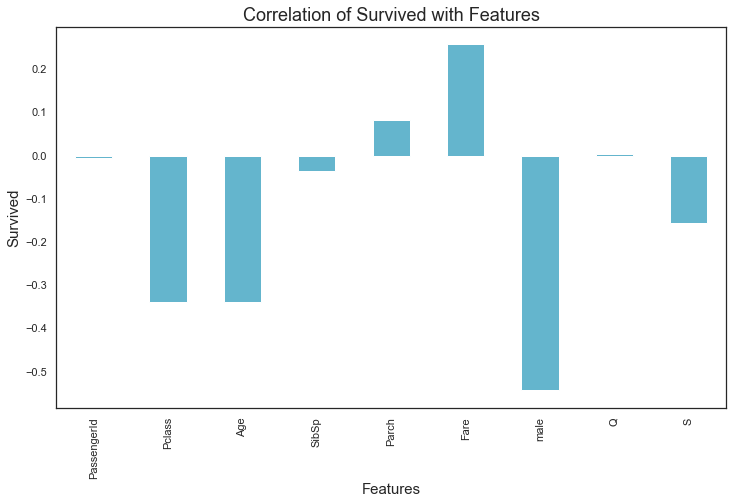

In [40]:
# Correlation with target variables Survived

plt.figure(figsize = (12,7))
titanic.corr()['Survived'].drop(['Survived']).plot(kind='bar',color ='c')
plt.xlabel('Features',fontsize=15)
plt.ylabel('Survived',fontsize=15)
plt.title('Correlation of Survived with Features',fontsize=18)
plt.show()

In [41]:
# Sorting columns by their Datatype

titanic.columns.to_series().groupby(titanic.dtypes).groups

{uint8: ['male', 'Q', 'S'], int64: ['PassengerId', 'Survived', 'Pclass', 'SibSp', 'Parch'], float64: ['Age', 'Fare']}

In [42]:
Numerical_features=['Survived', 'Pclass', 'SibSp', 'Parch', 'Age', 'Fare']
Categorical_features=['Sex', 'Embarked', 'Male']

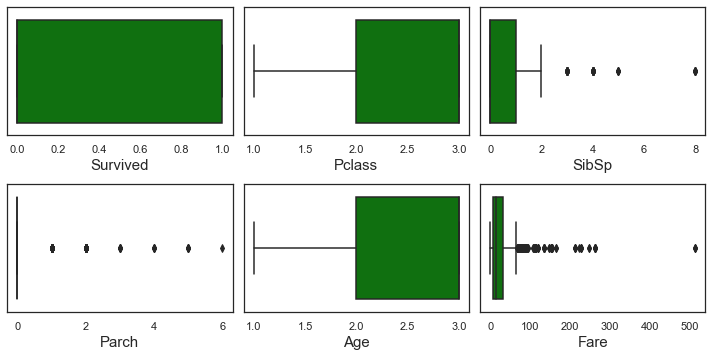

In [43]:
# Identifying the outliers using boxplot

plt.figure(figsize=(10,7),facecolor='white')
plotnumber=1
for i in Numerical_features:
    if plotnumber<=10:
        ax=plt.subplot(3,3,plotnumber)
        sb.boxplot(titanic[i],color='green')
        plt.xlabel(i,fontsize=15)
    plotnumber+=1
plt.tight_layout()

In [44]:
titanic

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,3.0,1,0,7.2500,1,0,1
1,2,1,1,1.0,1,0,71.2833,0,0,0
2,3,1,3,3.0,0,0,7.9250,0,0,1
3,4,1,1,1.0,1,0,53.1000,0,0,1
4,5,0,3,3.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,2.0,0,0,13.0000,1,0,1
887,888,1,1,1.0,0,0,30.0000,0,0,1
888,889,0,3,3.0,1,2,23.4500,0,0,1
889,890,1,1,1.0,0,0,30.0000,1,0,0


In [45]:
# We will import zscore from Scipy

from scipy.stats import zscore
z=np.abs(zscore(titanic))
print(np.where(z>3)) # displaying zscore after 3rd Std Dev

(array([  5,  13,  16,  16,  22,  25,  27,  28,  32,  44,  46,  47,  50,
        59,  68,  71,  82,  86,  88, 109, 116, 118, 119, 126, 143, 156,
       159, 164, 167, 171, 171, 180, 182, 186, 188, 196, 198, 201, 208,
       214, 233, 241, 245, 258, 260, 261, 264, 266, 274, 278, 278, 280,
       289, 299, 300, 301, 303, 311, 322, 324, 330, 341, 358, 359, 360,
       364, 368, 377, 380, 386, 388, 411, 412, 421, 428, 437, 438, 438,
       459, 468, 480, 501, 502, 510, 517, 525, 527, 541, 542, 552, 557,
       560, 567, 573, 593, 610, 612, 613, 626, 629, 638, 653, 654, 657,
       678, 679, 680, 683, 686, 689, 697, 700, 703, 716, 718, 727, 730,
       736, 737, 742, 749, 767, 768, 774, 776, 778, 779, 787, 787, 790,
       792, 813, 824, 825, 828, 846, 850, 858, 863, 885, 885, 890],
      dtype=int64), array([8, 5, 4, 8, 8, 5, 6, 8, 8, 8, 8, 8, 4, 4, 4, 4, 8, 5, 6, 8, 8, 6,
       4, 8, 8, 8, 4, 4, 5, 4, 8, 4, 4, 8, 8, 8, 8, 4, 8, 8, 4, 8, 8, 6,
       8, 4, 8, 4, 8, 4, 8, 8, 8, 6, 8, 8, 8,

In [46]:
# We will import zscore from Scipy

from scipy.stats import zscore
z=np.abs(zscore(titanic))
print(np.where(z<3)) # displaying zscore after 3rd Std Dev

(array([  0,   0,   0, ..., 890, 890, 890], dtype=int64), array([0, 1, 2, ..., 6, 7, 9], dtype=int64))


#### Observation from above:

- Now the data is ready to be trained and processed
- Survived is a DEPENDENT variable and rest are INDEPENDENT variables
- As the data has YES / NO values, Y variable can take only two values
- We will use Logistic Regression to predict the categorical dependent variable
- We can split the data into training and test

In [47]:
titanic.drop("Survived", axis=1)
titanic

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,3.0,1,0,7.2500,1,0,1
1,2,1,1,1.0,1,0,71.2833,0,0,0
2,3,1,3,3.0,0,0,7.9250,0,0,1
3,4,1,1,1.0,1,0,53.1000,0,0,1
4,5,0,3,3.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,2.0,0,0,13.0000,1,0,1
887,888,1,1,1.0,0,0,30.0000,0,0,1
888,889,0,3,3.0,1,2,23.4500,0,0,1
889,890,1,1,1.0,0,0,30.0000,1,0,0


In [48]:
titanic["Survived"].head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

## Pre-processing data by using essential ML libraries

In [49]:
# Importing essentital Machine Learning libraries

!pip install scikit-learn
!pip install xgboost
from sklearn.preprocessing import LabelEncoder # importing LabelEncoder
from sklearn.preprocessing import StandardScaler # importing StandardScaler
from sklearn.linear_model import LinearRegression # importing LinearRegression
from sklearn.linear_model import LogisticRegression # importing LogisticRegression
from sklearn.ensemble import RandomForestRegressor # importing RandomForestRegressor -- ensemble technique
from sklearn.tree import DecisionTreeRegressor # importing DecisionTreeRegressor
from sklearn.svm import SVR # importing SVR
import xgboost as xgb

# Now importing r2_score, MSE, MSA, accuracy_score, confusion_matrix below

from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, confusion_matrix, mean_absolute_error, classification_report
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, GridSearchCV, train_test_split

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [50]:
X_train, X_test, Y_train, Y_test=train_test_split(titanic.drop("Survived", axis=1), titanic["Survived"], test_size=0.20, random_state=150, shuffle=True)

In [51]:
logreg=LogisticRegression()
logreg.fit(X_train, Y_train)

LogisticRegression()

In [52]:
pred=logreg.predict(X_test)
pred

array([0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0], dtype=int64)

In [53]:
accuracy=confusion_matrix(Y_test, pred)
accuracy

array([[99, 11],
       [20, 49]], dtype=int64)

In [54]:
accuracy=accuracy_score(Y_test, pred)
accuracy

0.8268156424581006

In [55]:
print(classification_report(Y_test, pred))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       110
           1       0.82      0.71      0.76        69

    accuracy                           0.83       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.83      0.83      0.82       179



In [56]:
print('Mean Absolute Error:', mean_absolute_error(Y_test, pred))
print('Mean Squared Error:', mean_squared_error(Y_test, pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test, pred)))
print('R2 score:', r2_score(Y_test, pred))

Mean Absolute Error: 0.17318435754189945
Mean Squared Error: 0.17318435754189945
Root Mean Squared Error: 0.41615424729527806
R2 score: 0.2689064558629777


In [57]:
# Importing Pickle library

import pickle

In [58]:
filename='titanic.pkl'
pickle.dump(logreg,open(filename,'wb'))